In [5]:
%matplotlib inline
import matplotlib.pyplot as plt 
plt.style.use( 'ggplot' ) 

In [6]:
import pandas 
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.cross_validation import cross_val_predict, cross_val_score, StratifiedKFold
import numpy as np 
from scipy.stats import pearsonr

In [7]:
from sklearn.ensemble import BaggingRegressor

In [8]:
import pickle

In [9]:
# load in the pickled regression problems 

with open( 'combos.pkl', 'rb' ) as fn:
    combos = pickle.load( fn ) 
    
print( len( combos ) ) 

15


Using bagging

In [19]:
en_preds = []

for nm, target, X, y, support in combos:
    net = ElasticNetCV( cv=10, max_iter=1e9 )
    bag = BaggingRegressor( net, n_estimators=100, n_jobs=-1, oob_score=True ) 
    bag.fit( X, y ) 
    oob_sc = bag.oob_score_  
    preds = bag.predict( X )
    score = pearsonr( preds, y ) 
    en_preds.append( ( nm, target, X, y, preds, score, bag, oob_sc ) ) 

Facet the data sets and targets 

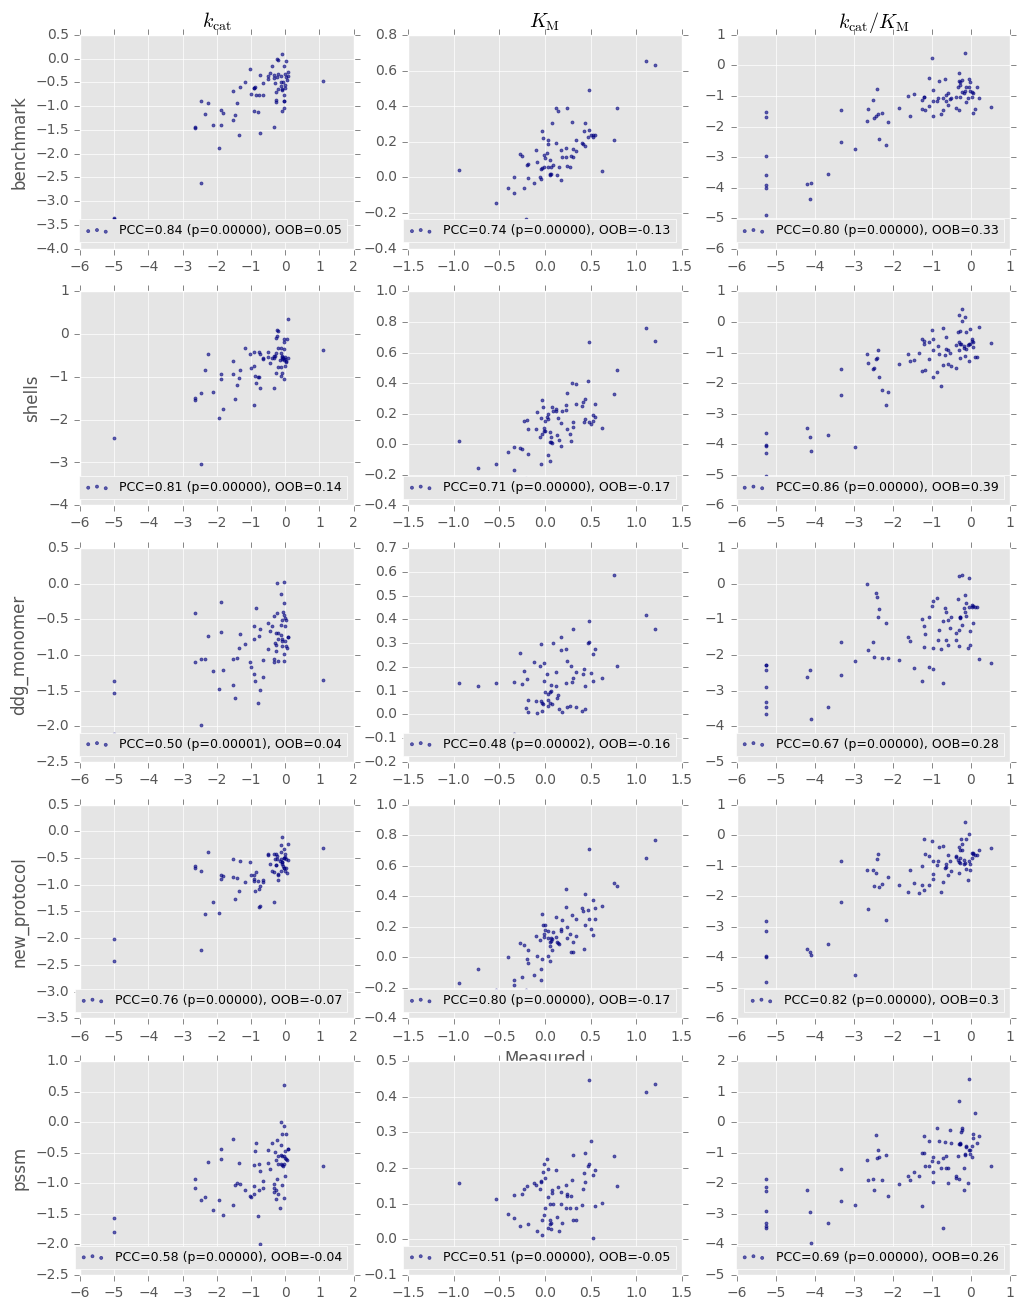

In [22]:
plt.figure( figsize=( 12, 16 ) ) 

for i, ( nm, target, X, y, preds, score, net, oob_sc ) in enumerate( en_preds ):
    
        plt.subplot( len( combos ) / 3, 3, i+1 )
        
        if i == 0:
            plt.title( '$k_{\mathrm{cat}}$' )
            plt.ylabel( nm ) 
        elif i == 1:
            plt.title( '$K_\mathrm{M}$' )
        elif i == 2:
            plt.title( '$k_{\mathrm{cat}}/K_\mathrm{M}$' ) 
        elif i % 3 == 0:
            plt.ylabel( nm ) 
        elif i == 10:
            plt.xlabel( 'Measured' ) 
        else:
            pass
        
        plt.scatter( y, preds, marker='.', color='navy', alpha=.6 )
        plt.legend( [ 'PCC={0:.2f} (p={1:.5f}), OOB={2}'.format( *score, oob_sc.round(2) ) ], loc='lower right', fontsize='9' ) 
        
plt.show()

Cleaned up a little bit, and plotting the OOB samples 

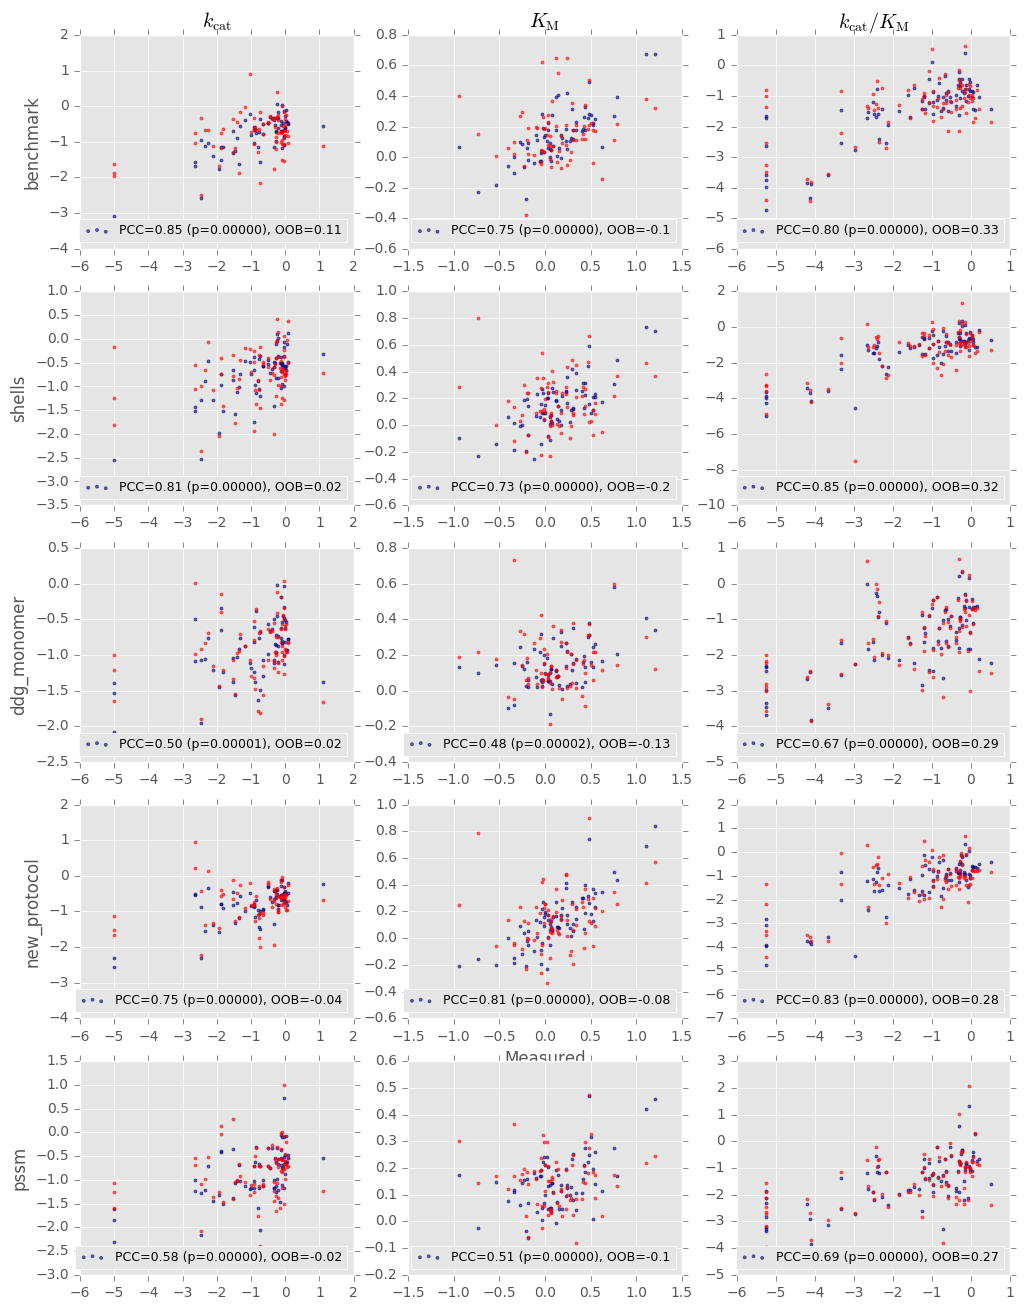

In [29]:
plt.figure( figsize=( 12, 16 ) ) 

for i, (nm, target, X, y, support) in enumerate( combos ):
    
    # fit 
    net = ElasticNetCV( cv=10, max_iter=1e9 )
    bag = BaggingRegressor( net, n_estimators=100, n_jobs=-1, oob_score=True ) 
    bag.fit( X, y ) 
    oob_sc = bag.oob_score_  
    preds = bag.predict( X )
    score = pearsonr( preds, y ) 
    oob_preds = bag.oob_prediction_
    
    # plot 
    plt.subplot( len( combos ) / 3, 3, i+1 )

    if i == 0:
        plt.title( '$k_{\mathrm{cat}}$' )
        plt.ylabel( nm ) 
    elif i == 1:
        plt.title( '$K_\mathrm{M}$' )
    elif i == 2:
        plt.title( '$k_{\mathrm{cat}}/K_\mathrm{M}$' ) 
    elif i % 3 == 0:
        plt.ylabel( nm ) 
    elif i == 10:
        plt.xlabel( 'Measured' ) 
    else:
        pass

    plt.scatter( y, preds, marker='.', color='navy', alpha=.6 )
    plt.scatter( y, oob_preds, marker='.', color='red', alpha=.6 ) 
    plt.legend( [ 'PCC={0:.2f} (p={1:.5f}), OOB={2}'.format( *score, oob_sc.round(2) ) ], loc='lower right', fontsize='9' ) 

plt.show()